In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [3]:
X = np.linspace( 0 , 50 , 501 )

In [4]:
y = np.sin(X)

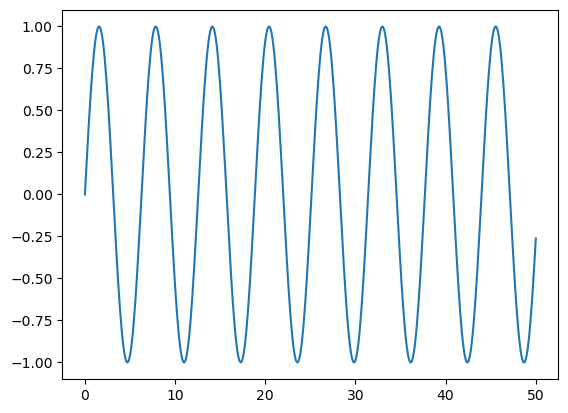

In [5]:
plt.plot(X , y )

In [6]:
df = pd.DataFrame( data = y , index= X , columns=['sinus'])

In [7]:
df.head()

,sinus
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


## Division en train et test

In [8]:
len(df)

501

In [9]:
poucentage =  len(df) * 0.1 # nous prenon 10 % du dataset`
poucentage

50.1

In [10]:
poucentage = np.round_(len(df) * 0.1 ) 
poucentage

50.0

In [11]:
train = df.iloc[ :(len(df)) - int(poucentage)  ]

In [12]:
test = df.iloc[ (len(df)) - int(poucentage) : ]

In [13]:
train.shape

(451, 1)

In [14]:
test.shape

(50, 1)

In [15]:
test

,sinus
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


# normalisation

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()
Scaler_train = scaler.fit_transform(train)
scaler_test = scaler.transform(test)

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module keras.src.legacy.preprocessing.sequence:

class TimeseriesGenerator(keras.src.trainers.data_adapters.py_dataset_adapter.PyDataset)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |
 |  Utility class for generating batches of temporal data.
 |
 |  DEPRECATED.
 |
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |
 |  Arguments:
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 |      length: Length of 

In [32]:
Lenght = 25 # longueure de sequence de sortie en nombre de pas tempotrel 
Batch_size = 1 # nombre d'echantillon retourner 

generateur = TimeseriesGenerator( Scaler_train , Scaler_train , length = Lenght ,  batch_size= Batch_size  )

In [33]:
len(Scaler_train)

451

In [34]:
len(generateur) # len(Scaler_train) - Lenght

426

In [35]:
X , y =  generateur[0] # on retourn le premier batch generer a partie du generateur 

In [36]:
X

array([[[0.49999912],
        [0.54991622],
        [0.59933458],
        [0.64776041],
        [0.69470985],
        [0.73971381],
        [0.78232262],
        [0.82211054],
        [0.85868004],
        [0.89166571],
        [0.92073798],
        [0.94560637],
        [0.9660224 ],
        [0.98178208],
        [0.99272794],
        [0.99875061],
        [0.99978993],
        [0.9958355 ],
        [0.98692684],
        [0.97315296],
        [0.95465148],
        [0.93160726],
        [0.90425056],
        [0.87285471],
        [0.83773342]]])

In [37]:
y

array([[0.79923759]])

<Axes: >

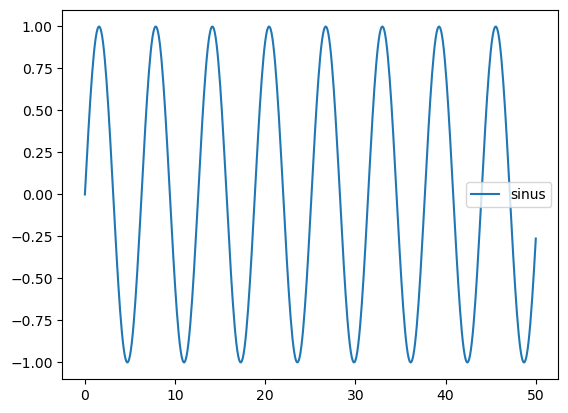

In [38]:
df.plot()

# Model 

In [39]:
Lenght = 50
Batch_size = 1

generateur = TimeseriesGenerator( Scaler_train , Scaler_train , length = Lenght ,  batch_size= Batch_size  )

In [40]:
from tensorflow.keras.models import Sequential

In [41]:
from tensorflow.keras.layers import Dense , SimpleRNN , LSTM

In [42]:
nbr_features = 1 # nombre de fueature sur lequel nous allons entrainner le model ( icic on n'a un feature X pour predire y )


In [43]:
model = Sequential()
model.add( SimpleRNN( units=50 , input_shape = ( Lenght , nbr_features )))
model.add( Dense(1) )

model.compile( optimizer = 'adam' , loss = 'mse' )

2025-04-19 11:29:18.928191: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-04-19 11:29:18.928560: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-19 11:29:18.928574: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-19 11:29:18.928740: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-19 11:29:18.928783: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, pref

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.fit(generateur , epochs=5)

Epoch 1/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 238s 594ms/step - loss: 0.0019
Epoch 2/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 248s 620ms/step - loss: 0.0011
Epoch 3/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 250s 625ms/step - loss: 2.5807e-05
Epoch 4/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 252s 629ms/step - loss: 4.3744e-05
Epoch 5/5
401/401 ━━━━━━━━━━━━━━━━━━━━ 279s 696ms/step - loss: 2.1516e-04


In [47]:
lossse = pd.DataFrame( model.history.history )

<Axes: >

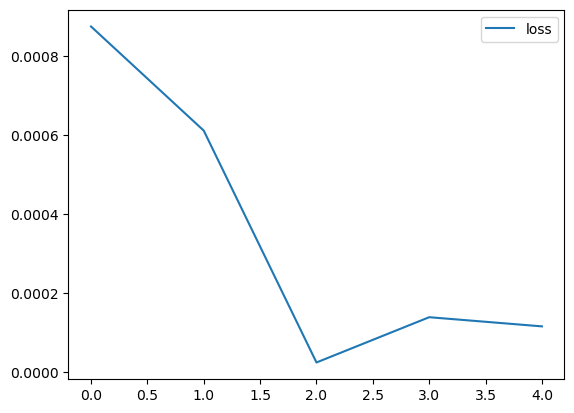

In [48]:
lossse.plot()